In [40]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
load_file = 'output/diabetes_results.npz'
# load_file = 'output/diabetes_results_minority_female.npz'
# load_file = 'output/diabetes_results_minority_africanamerican.npz'
# load_file = 'output/diabetes_results_minority_asian.npz'
# load_file = 'output/diabetes_results_minority_hispanic.npz'
# load_file = 'output/diabetes_results_minority_other.npz'

f = np.load(load_file)
orig_results = f['orig_results']
flipped_results = f['flipped_results']
fixed_influence_loo_results = f['fixed_influence_loo_results']
fixed_loss_results = f['fixed_loss_results']
fixed_random_results = f['fixed_random_results']
proportion_counts_influence = f['proportion_counts_influence']
proportion_counts_loss = f['proportion_counts_loss']
proportion_counts_random = f['proportion_counts_random']

# female(36996), male(31640), africanamerican(13106), asian(429), caucasian(52632), hispanic(1414), other(1055)
print(proportion_counts_influence[0, 0, :, :])
print(proportion_counts_loss[0, 0, :, :])
print(proportion_counts_random[0, 0, :, :])


[[ 2353.  1847.   766.    45.  3218.   104.    67.]
 [ 4674.  3726.  1545.    66.  6462.   204.   123.]
 [ 6982.  5618.  2340.   108.  9664.   300.   188.]
 [ 9225.  7575.  3162.   133. 12830.   403.   272.]
 [11551.  9449.  4010.   167. 15989.   497.   337.]
 [13896. 11304.  4854.   188. 19167.   584.   407.]]
[[ 2234.  1966.   904.    45.  3051.   113.    87.]
 [ 4460.  3940.  1641.    78.  6312.   197.   172.]
 [ 6690.  5910.  2438.   106.  9542.   278.   236.]
 [ 8976.  7824.  3251.   123. 12785.   355.   286.]
 [11218.  9782.  4045.   138. 16056.   426.   335.]
 [13492. 11708.  4817.   152. 19361.   498.   372.]]
[[ 2287.  1913.   802.    25.  3227.    77.    69.]
 [ 4590.  3810.  1586.    46.  6469.   170.   129.]
 [ 6831.  5769.  2378.    70.  9699.   251.   202.]
 [ 9106.  7694.  3185.    90. 12918.   341.   266.]
 [11348.  9652.  3999.   117. 16149.   418.   317.]
 [13624. 11576.  4843.   140. 19343.   502.   372.]]


Fraction of flips: 0.1
fe


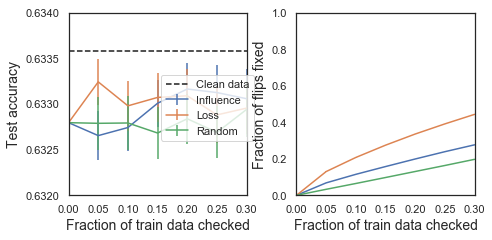

In [66]:
sns.set_style('white')
fontsize=14

x = np.arange(0, 0.35, 0.05)
metric_idx = 0

flip_mean = np.mean(flipped_results, axis=1)
flip_error = np.std(flipped_results, axis=1) / np.sqrt(flipped_results.shape[1])

fig, axs = plt.subplots(1, 2, figsize=(7,3.5))

# flip_idx = 0, 1, 2, 3, 4, 5 represents fraction of mislabels (0.05, 0.10, 0.15, 0.20, 0.25, 0.30)
flip_idx = 1
print("Fraction of flips: %s" % ((flip_idx + 1) * 0.05))

if len(load_file) > 24:
    print(load_file[33:35])
    if load_file[33:35] == 'fe':  # female
        num_train_examples = 36996
    elif load_file[33:35] == 'af':  # africanamerican
        num_train_examples = 13106
    elif load_file[33:35] == 'as':  # asian
        num_train_examples = 429
    elif load_file[33:35] == 'hi':  # hispanic
        num_train_examples = 1414
    elif load_file[33:35] == 'ot':  # other
        num_train_examples = 1055
else:
    num_train_examples = 68636
    
num_flips = int(num_train_examples / 20) * (flip_idx + 1)  

for ax, metric_idx in zip(axs, [2, 0]):
    for results, label in [
        (fixed_influence_loo_results, 'Influence'),
        (fixed_loss_results, 'Loss'), 
        (fixed_random_results, 'Random')]:
        mean = np.mean(results, axis=2)[flip_idx, :, metric_idx]
        error = np.std(results, axis=2)[flip_idx, :, metric_idx] / np.sqrt(results.shape[2])
        mean = np.insert(mean, 0, flip_mean[flip_idx, metric_idx]) 
        error = np.insert(error, 0, flip_error[flip_idx, metric_idx])

        if metric_idx == 0:
            mean /= num_flips
            error /= num_flips
            
        ax.errorbar(
            x, 
            mean,
            error,
            label=label)
        ax.set_xlim((0, 0.30))
        ax.set_xticks(x)
        ax.set_xlabel('Fraction of train data checked', fontsize=fontsize)

    if metric_idx > 0:
        ax.plot(
            x, 
            [orig_results[metric_idx - 1]] * len(x),
            '--',
            color='k',
            label='Clean data')
        ax.legend(loc=(0.52,0.30), fontsize=fontsize-3)          
        ax.set_ylim((0.632, 0.634))
        ax.set_ylabel('Test accuracy', fontsize=fontsize)

    else:
        ax.set_ylim((0, 1))
      
        ax.set_ylabel('Fraction of flips fixed', fontsize=fontsize)

plt.tight_layout()
plt.subplots_adjust(wspace=0.28)

plt.savefig('../figs/fig-diabetes-female.png', dpi=600, bbox_inches='tight')